In [1]:
import skrf as rf #required for working w/ .s2p files from Keysight FieldFox
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

import os
import re
from collections import defaultdict

import glob
from pathlib import Path
import numpy as np

In [2]:
%matplotlib widget

In [3]:
def plotter(freqs_mhz, s_params_db, param_name="S21"):
    """
    Plots the specified S-parameter across varying control temperatures.
    NOTE: there are two sets of temperatures, case temps (LNA enclosure) and control temps
          (control temps are what the thermistor outputs on the controller...).
          Case temps tend to run slightly hotter than what the controller is outputting. 
          The case temps are specified in the file names...

    Parameters:
    ----------
    freqs_mhz : array-like...
        Frequency axis in MHz.
    s_params_db : dict
        Dictionary where keys are control temperatures and values are S-parameter data (in dB).
        Example structure: {25: array([...]), 30: array([...]), ...}
    param_name : str
        Simply the name of the s-params to plot... "S21" etc...
    """

    sns.set_context("paper")
    sns.set_style("whitegrid")
    sns.set_palette("colorblind")

    fig, ax = plt.subplots(figsize=(12, 6))

    for cont_temp, s_param in sorted(s_params_db.items()):
        sns.lineplot(x=freqs_mhz, y=s_param, label=f"{cont_temp}°C", ax=ax, lw=2.3)

    ax.set_title(f"LNA ${param_name}$ at Varying Control Temperatures", fontsize=12)
    ax.set_xlabel("Frequency (MHz)", fontsize=12)
    ax.set_ylabel(rf"${param_name}$ (dB)", fontsize=12)
    ax.set_xlim(50, 250)
    
    ax.set_ylim() if param_name != "S21" else ax.set_ylim(23, 25.5) # simply setting the y-axis limit for s21...

    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())

    ax.tick_params(axis='both', which='major', direction='in', length=6, width=1, bottom=True, left=True)
    ax.tick_params(axis='both', which='minor', direction='in', length=3, width=0.8, bottom=True, left=True)

    for spine in ax.spines.values():
        spine.set_linewidth(1.2)

    # ax.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.85)

    ax.legend(
        title="Control Temp",
        fontsize=11,
        ncol=3,
        title_fontsize=11,
        loc="upper right",
        borderaxespad=0,
        frameon=True
    )

    fig.tight_layout()
    plt.show()

In [4]:
def some_plots(filenames, title="S21 Gain vs Frequency"):
    """
    Plot S21 from multiple sets of s2p files.

    Parameters:
    ----------
    file_sets : list of lists
        Each inner list contains filenames to plot as a set.
    labels_sets : list of lists
        Each inner list contains legend labels corresponding to each file in the set.
    title : str
        it's the title.
    """
    plt.figure(figsize=(10, 6))

    for file in filenames:
        ntwk = rf.Network(file)
        ntwk.plot_s_db(m=1, n=0, lw=2, label=file.replace('.s2p', '')) # (m=1, n=0) is the S21 parameter...

    plt.title(title)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel(r"$S_{21}$ (dB)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [5]:
atten_files = sorted(glob.glob('trx_test_*atten.s2p'))
# atten_labels = [f.split('_')[-1].replace('.s2p', '').replace('atten', ' dB Atten') for f in atten_files]

# atten_files = [
#     "trx_test_0atten.s2p",
#     "trx_test_5atten.s2p",
#     "trx_test_10atten.s2p",
#     "trx_test_15atten.s2p",
#     "trx_test_20atten.s2p",
#     "trx_test_25atten.s2p"
# ]
atten_files

['trx_test_-20dbm_input_25atten.s2p',
 'trx_test_-20dbm_input_30dbatten.s2p',
 'trx_test_0atten.s2p',
 'trx_test_10atten.s2p',
 'trx_test_15atten.s2p',
 'trx_test_20atten.s2p',
 'trx_test_25atten.s2p',
 'trx_test_5atten.s2p']

In [27]:
# some_plots(atten_files, title='something')

### April 18th | varying input power with fixed 50db attenuation

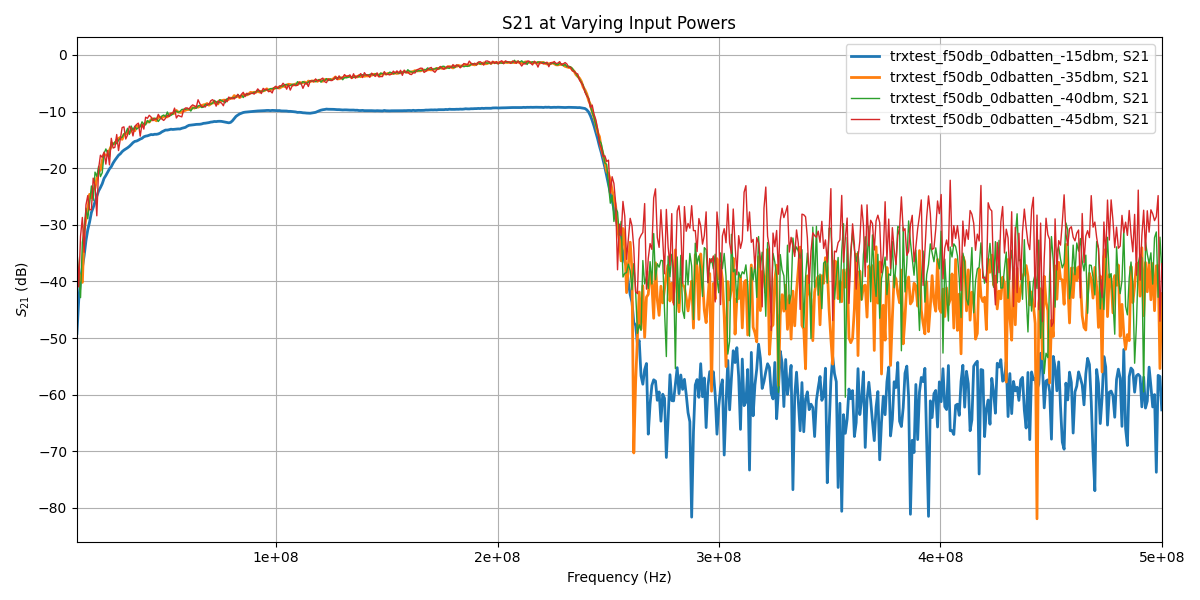

In [6]:
plt.figure(figsize=(12,6))

ntwk1 = rf.Network('trxtest_f50db_0dbatten_-15dbm.s2p')
ntwk2 = rf.Network('trxtest_f50db_0dbatten_-35dbm.s2p')
ntwk3 = rf.Network('trxtest_f50db_0dbatten_-40dbm.s2p')
ntwk4 = rf.Network('trxtest_f50db_0dbatten_-45dbm.s2p')

ntwk1.plot_s_db(m=1, n=0, lw=2)
ntwk2.plot_s_db(m=1, n=0, lw=2)
ntwk3.plot_s_db(m=1, n=0, lw=1)
ntwk4.plot_s_db(m=1, n=0, lw=1)

plt.title("S21 at Varying Input Powers")
plt.xlabel("Frequency (Hz)")
plt.ylabel(r"$S_{21}$ (dB)")
plt.grid(True)
plt.tight_layout()
plt.show()

### April 18th | varying Trx attenuation, -20dbm (?) input power, 0 fixed attenuation

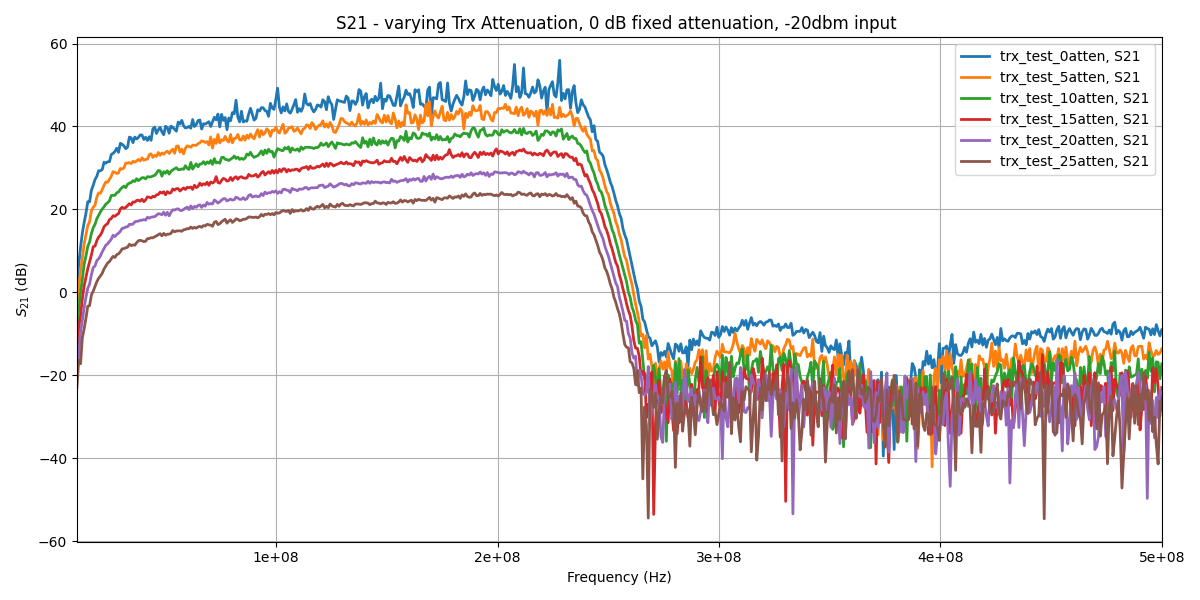

In [7]:
plt.figure(figsize=(12,6))

ntwkx = rf.Network('trx_test_0atten.s2p')
ntwk0 = rf.Network('trx_test_5atten.s2p')
ntwk1 = rf.Network('trx_test_10atten.s2p')
ntwk2 = rf.Network('trx_test_15atten.s2p')
ntwk3 = rf.Network('trx_test_20atten.s2p')
ntwk4 = rf.Network('trx_test_25atten.s2p')

ntwkx.plot_s_db(m=1, n=0, lw=2)
ntwk0.plot_s_db(m=1, n=0, lw=2)
ntwk1.plot_s_db(m=1, n=0, lw=2)
ntwk2.plot_s_db(m=1, n=0, lw=2)
ntwk3.plot_s_db(m=1, n=0, lw=2)
ntwk4.plot_s_db(m=1, n=0, lw=2)

plt.title("S21 - varying Trx Attenuation, 0 dB fixed attenuation, -20dbm input ")
plt.xlabel("Frequency (Hz)")
plt.ylabel(r"$S_{21}$ (dB)")
plt.grid(True)
# plt.legend(["10 dB Atten", "15 dB Atten", "20 dB Atten", "25 dB Atten"])
plt.tight_layout()
plt.show()

In [31]:
# plt.figure(figsize=(12,6))
# ntwkxx=rf.Network("trxtest_-20dbmpower_15dbatten.s2p")
# ntwkxx.plot_s_db(m=1, n=0, lw=2)
# plt.show()

In [92]:
# TOKEN_RE = {
#     "fix": re.compile(r"f(-?\d+)db", re.I),                 # f50db … fixed attenuators
#     "trx": re.compile(r"_(-?\d+)(?:db)?atten", re.I),       # _25atten  or _25dbatten attenuation set on Trx
#     "pin": re.compile(r"(-?\d+)dbm", re.I),                 # -15dbm input power set on FieldFox
# }


# def meta_from_name(name: str):
#     out = {}
#     for k, rx in TOKEN_RE.items():
#         m = rx.search(name)
#         if m: out[k] = float(m.group(1))
#     return out

# def s21_gain(net: rf.Network, f_lo=10e6, f_hi=500e6):
#     mask = (net.f >= f_lo) & (net.f <= f_hi)
#     return 20*np.log10(np.abs(net.s[:, 1, 0][mask])).mean()


In [29]:
# root = Path("/Users/rs_mbpro14/RAL/RFoF/apr18_Trx_test") 

# rows = []
# for fn in root.glob("*.s2p"):
#     meta = meta_from_name(fn.name)
#     if {"pin", "trx", "fix"} <= meta.keys():
#         ntw   = rf.Network(fn)
#         gain  = s21_gain(ntw)
#         pout  = meta["pin"] - meta["fix"] + gain
#         rows.append({**meta,
#                      "gain_dB":  gain,
#                      "pout_dBm": pout,
#                      "file":     fn.name})

# df = pd.DataFrame(rows).sort_values(["fix", "trx", "pin"])
# # # If 'fix' is missing it means no fixed attenuator ⇒ define it as 0 dB
# # df["fix"] = df["fix"].fillna(0).astype(float)

# # # Keep a flag in case you still want to know which files *really* had none
# # df["has_fix"] = df["fix"] != 0
# # df = df.sort_values(["fix", "trx", "pin"]).reset_index(drop=True)


# df.head()


In [28]:
# df

### April 16th | Transmitter to PAM receiver, sig. gen. input signal of 100 - 200 MHz at -15.8 dBm input power

In [8]:
data_100 = np.load("/Users/rs_mbpro14/RAL/RFoF/apr16_Trx_PAM_test/100mhz_wave.npz")
data_150 = np.load("/Users/rs_mbpro14/RAL/RFoF/apr16_Trx_PAM_test/150mhz_wave.npz")
data_200 = np.load("/Users/rs_mbpro14/RAL/RFoF/apr16_Trx_PAM_test/200mhz_wave.npz")

print(data_100.files)  # Check what keys are stored inside

['0', '1', '2', '3', '4', '5', '02', '24', '04', '13', '35', '15']


In [9]:
SAMPLE_RATE = 500
NCHAN = 1024

def plot(
    file,
    pairs=["0", "1", "2", "3", "4", "5", "02", "04", "24", "13", "15", "35"],
    x=np.linspace(0, SAMPLE_RATE / 2, num=NCHAN, endpoint=False),
    log_scale=True,
):
    """
    Parameters
    ----------
    fname
    pairs : str or list of str
        Correlation pairs to plot. Defaults to all pairs.
    x : array-like
        The x-axis. Defaults to the frequency channels defined by NCHAN and
        SAMPLE_RATE.
    
    """
    if isinstance(pairs, str):
        pairs = [pairs]

    colors = {}
    for i, p in enumerate(pairs):
        # there are only 10 colors in the default color cycle
        if i == 0:
            colors[p] = "black"
        elif i == 1:
            colors[p] = "lime"
        else:  # pairs 0-9, and repeats if more than 12 pairs
            colors[p] = f"C{i-2}"

    mag_lines = {}
    phase_lines = {}
    nrows = 1
    plt.ion()
    fig, axs = plt.subplots(figsize=(12, 6), nrows=nrows)
    axs = [axs]
    axs[0].grid()
    #axs[1].grid()
    #axs[0].sharex(axs[1])
    axs[0].set_ylabel("Magnitude")
    #axs[1].set_ylabel("Phase")
    axs[0].set_xlabel("Frequency (MHz)")
    for p in pairs:
        line_kwargs = {"color": colors[p], "label": p}
        if log_scale:
            (line,) = axs[0].semilogy(x, np.ones(NCHAN), **line_kwargs)
        else:
            (line,) = axs[0].plot(x, np.ones(NCHAN), **line_kwargs)
        mag_lines[p] = line
    ymax_mag = 0
    #axs[1].set_ylim(-np.pi, np.pi)
    axs[0].legend(bbox_to_anchor=(1.1, 1.1), loc="upper right")
    axs[0].set_ylim(1e7, 1e9)
    axs[0].grid()
    for p in pairs:
        dt = np.dtype(np.int32).newbyteorder(">")
        data = np.frombuffer(file.get(p), dtype=dt)
        ymax_mag = np.maximum(ymax_mag, data.max())
        #axs[0].set_ylim(1e1, ymax_mag)
        if len(p) == 1:  # auto
            mag_lines[p].set_ydata(data)
    plt.show()


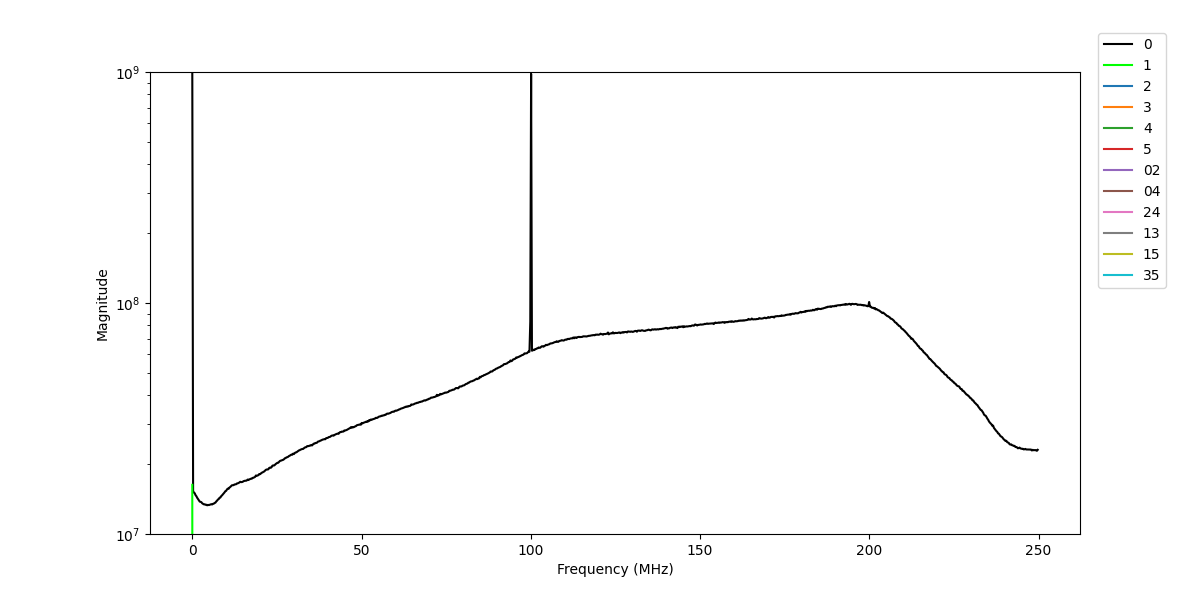

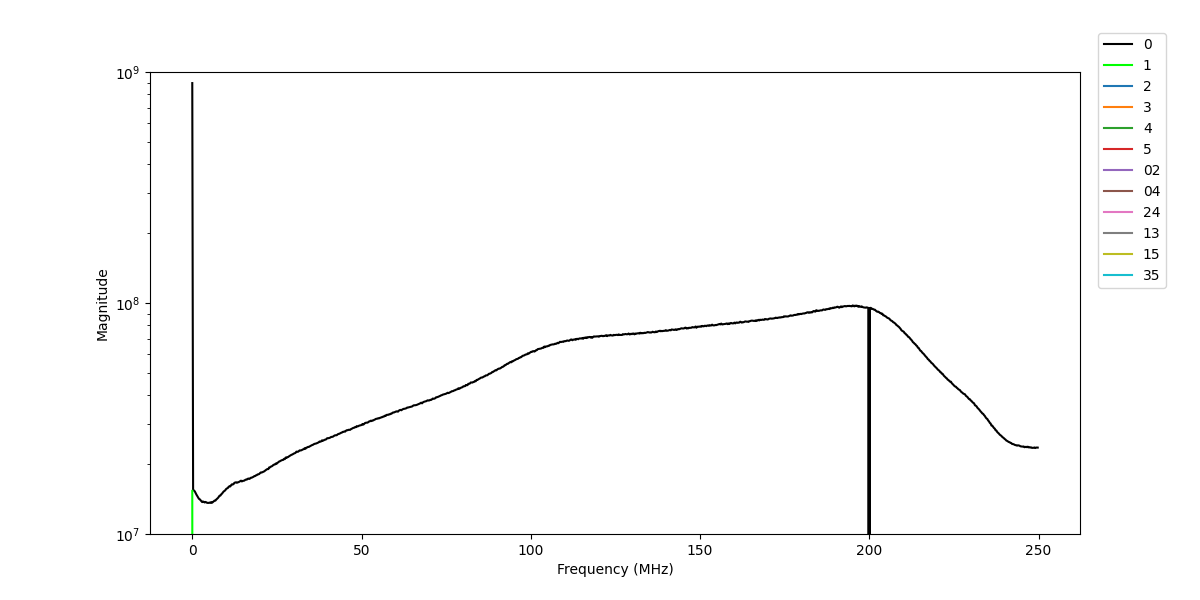

In [10]:
plot(data_100)
plot(data_200)

### April 30th | FEM to PAM receiver baseline test

- Comparison of the FEM with the new Ftx module using the same PAM receiver
- The goal is to understand how much gain is required from exernal amplifiers to make the
  new Ftx module the same as the FEM.

- Set -25.0 dbm input power on FieldFox with an addition 60 dB fixed attenuation on port 1 outputting to the FEM input.
- The Trx test includes an amplifier (zx60-p103LN+)

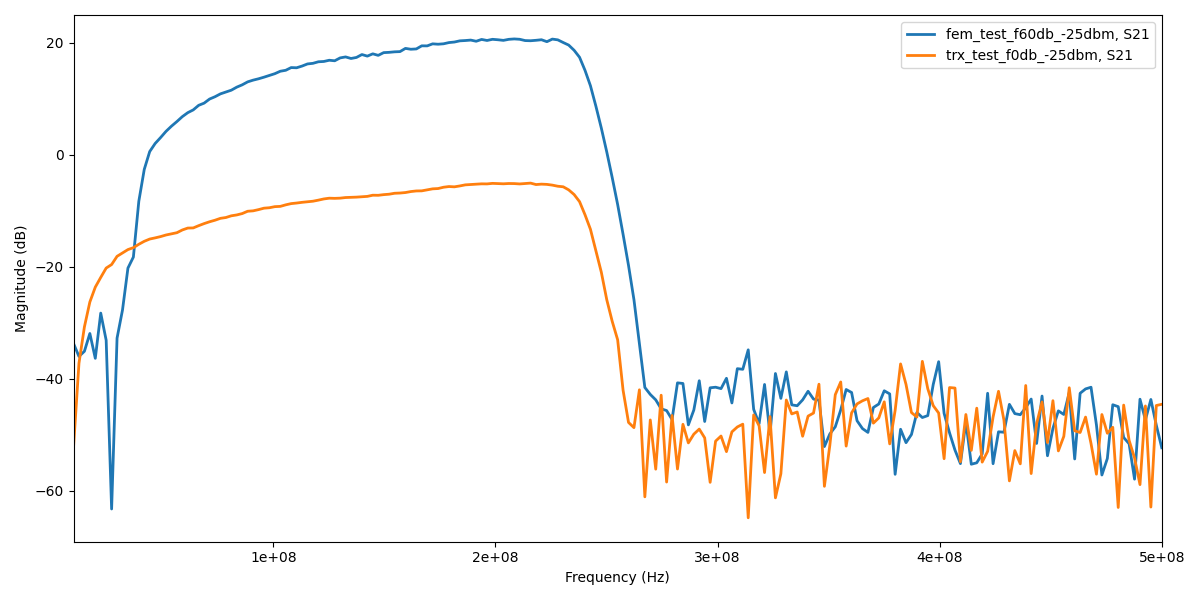

In [13]:
plt.figure(figsize=(12,6))
fem = rf.Network('/Users/rs_mbpro14/RAL/RFoF/apr30_FEM_Trx_test/fem_test_f60db_-25dbm.s2p')
trx = rf.Network('/Users/rs_mbpro14/RAL/RFoF/apr30_FEM_Trx_test/trx_test_f0db_-25dbm.s2p')
# lna = rf.Network('/Users/rs_mbpro14/RAL/RFoF/apr30_FEM_Trx_test/zx60-p103ln+.s2p')

fem.plot_s_db(m=1, n=0, lw=2)
trx.plot_s_db(m=1, n=0, lw=2)
# lna.plot_s_db(m=1, n=0, lw=2)

plt.tight_layout()
plt.show()